In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [21]:
class Kmeans_clustering:
    def __init__(self, X, num_cluster):
        self.K = num_cluster
        self.max_iteration = 100
        self.num_samp, self.num_features = X.shape
        self.plot_fig = True
        
    def init_centroids_randomly(self, X):
        centroids = np.zeros((self.K, self.num_features))
        for i in range(self.K):
            centroids[i] = X[np.random.choice(range(self.num_samp))]
        
        return centroids
            
        
    def create_clusters(self, X, centroids):
        clusters = [[] for i in range(self.K)]
        for idx, point in enumerate(X):
            cluster_idx = np.argmin(np.sqrt(np.sum((point-centroids)**2, axis=1)))
            clusters[cluster_idx].append(idx)
            
        return clusters
        
    
    def update_centroids(self, clusters, X):
        centroids = np.zeros((self.K, self.num_features))
        for i, cluster in enumerate(clusters):
            centroids[i] = np.mean(X[cluster], axis=0)
            
        return centroids
        
    def predict(self, X, clusters):
        y_pred = np.zeros(len(X))
        for idx, cluster in enumerate(clusters):
            for obs in cluster:
                y_pred[obs] = idx
            
        return y_pred
    
    def plot_clusters(self, X, y_pred):
        if self.plot_fig == True:
            plt.scatter(X[:,0], X[:,1], c = y_pred, cmap='viridis')
            plt.show()
        
        
        
    def fit_kmeans(self, X):
        centroids = self.init_centroids_randomly(X)
        
        for i in range(self.max_iteration):
            clusters = self.create_clusters(X, centroids)
            prev_centroids = centroids
            centroids = self.update_centroids(clusters, X)
            difference = prev_centroids - centroids
            if not difference.any():
                break
                
        y = self.predict(X, clusters)
        self.plot_clusters(X, y)
            
        return y
    
    
        
    

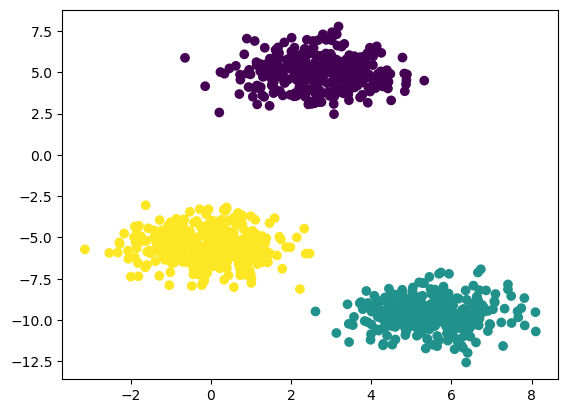

In [23]:
np.random.seed(10)
num_clusters = 3
X, true_labels = make_blobs(n_samples=1000, n_features=2, centers=num_clusters)
Kmeans = Kmeans_clustering(X, num_clusters)
y_pred_1 = Kmeans.fit_kmeans(X)

In [5]:
#scaler = StandardScaler()
#features = scaler.fit_transform(features)

In [24]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
    )

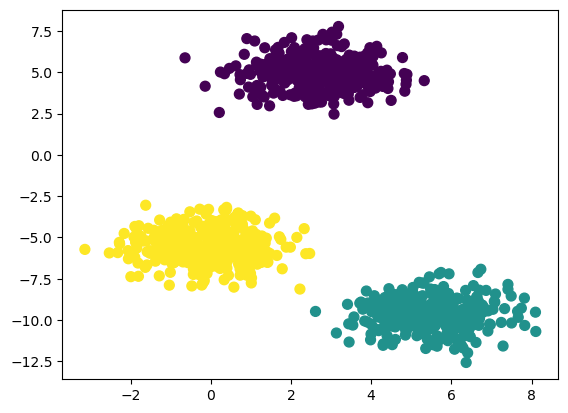

In [25]:
kmeans.fit(X)
y_pred_2 = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis')
plt.show()

In [29]:
print("is there a diffrence between python KMeans and the Kmeans_clustering : ", not (y_pred_1-y_pred_2).any())

is there a diffrence between python KMeans and the Kmeans_clustering :  False
